# Constructing Specification FSMs from beliefs

In [2]:
from SpecificationFSMTools import *
from copy import deepcopy
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [16,9]


Recall the 3 cases from the planning problem formulation. We will consider a task where three subtasks 'A', 'B', and 'C' need to be completed and construct specification FSM that correspond to different beliefs. Lets begin by defining the three probability distributions

In [3]:
Formulas = {}
Probs = {}

#Case 1 most likely is also the most restrictive

Formulas[1] = []
Formulas[1].append(['and',['F',['A']],['F',['B']],['F',['C']],['G',['D']]])
Formulas[1].append(['and',['F',['A']],['F',['B']], ['G',['E']]])
Formulas[1].append(['and',['F',['A']],['G',['P']]])

#check whether each is a valid formula
validity = reduce(lambda memo, formula: memo and VerifyFormulaSyntax(formula)[0], Formulas[1], True)
print('Formula[1] specification set is:', validity)
Probs[1] = [0.7, 0.2, 0.1]

Formulas[2] = []
Formulas[2] = deepcopy(Formulas[1])
Probs[2] = [0.1, 0.2, 0.7] # Lease restrictive is most likely

Formulas[3] = []
Formulas[3].append(['and',['F',['A']], ['G',['D']]])
Formulas[3].append(['and',['F',['B']],['G',['E']]])
Formulas[3].append(['and',['F',['C']],['G',['P']]])
validity = reduce(lambda memo, formula: memo and VerifyFormulaSyntax(formula)[0], Formulas[3], True)
print('Formula[3] specification set is:', validity)
Probs[3] = [0.3,0.4,0.3]

Formulas[4] = []
Formulas[4].append(['and',['F',['A']],['G',['not',['C']]]])
Formulas[4].append(['and',['F',['B']],['G',['not',['C']]]])
Formulas[4].append(['and',['F',['C']],['G',['D']]])
validity = reduce(lambda memo, formula: memo and VerifyFormulaSyntax(formula)[0], Formulas[4], True)
print('Formula[4] specification set is:', validity)
Probs[4] = [0.2,0.2,0.6]

Formula[1] specification set is: True
Formula[3] specification set is: True
Formula[4] specification set is: True


Lets save some time and define the state machines for all these cases


In [4]:
spec_fsm_map = {}
spec_fsm_max_cover = {}
spec_fsm_min_regret = {}
spec_fsm_cc = {}

for i in [1,2,3,4]:
    spec_fsm_map[i] = SpecificationFSM(Formulas[i], Probs[i], reward_type='map')
    spec_fsm_max_cover[i] = SpecificationFSM(Formulas[i], Probs[i], reward_type='max_cover')
    spec_fsm_min_regret[i] = SpecificationFSM(Formulas[i], Probs[i], reward_type='min_regret')
    for failure_prob in [0.25, 0.5, 0.75]:
        spec_fsm_cc[(i,failure_prob)] = SpecificationFSM(Formulas[i], Probs[i], reward_type='chance_constrained', risk_level=failure_prob)

## Most restrictive is also most likely ##

lets start with the Formulas[1] and the MAP formulation

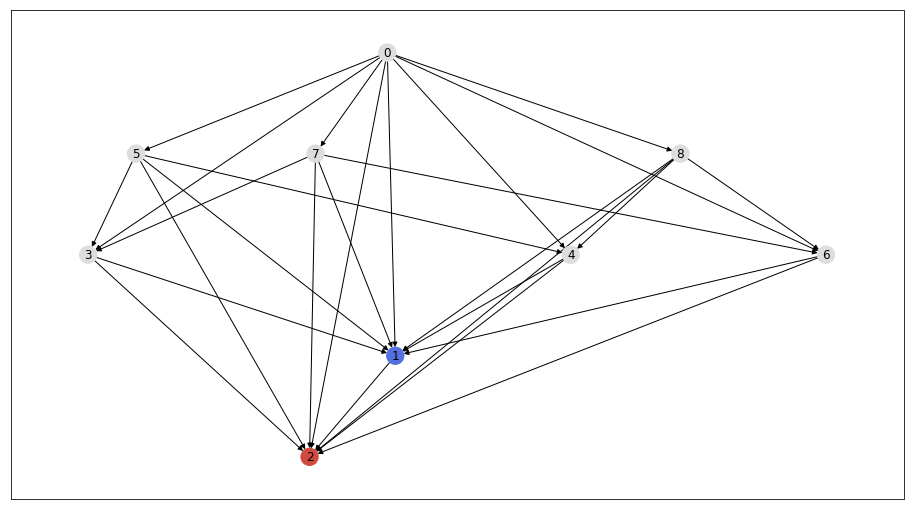

In [5]:
G, colors = spec_fsm_map[1].visualize()

Here is what the nodes represent

In [60]:
spec_fsm_map[1].id2states

{0: ('["and", ["F", ["A"]], ["F", ["B"]], ["F", ["C"]], ["G", ["D"]]]',),
 1: ('["G", ["D"]]',),
 2: ('[false]',),
 3: ('["and", ["F", ["C"]], ["G", ["D"]]]',),
 4: ('["and", ["F", ["B"]], ["G", ["D"]]]',),
 5: ('["and", ["F", ["B"]], ["F", ["C"]], ["G", ["D"]]]',),
 6: ('["and", ["F", ["A"]], ["G", ["D"]]]',),
 7: ('["and", ["F", ["A"]], ["F", ["C"]], ["G", ["D"]]]',),
 8: ('["and", ["F", ["A"]], ["F", ["B"]], ["G", ["D"]]]',)}

This is just the progressions states of the single most likely formula.

We know that the state machine and the reward structure for the first one should look very similar in all the cases. So lets consider the maximum coverage formulation

Now lets see what the MAP formulation for the other ones looks like. Heres the one for Formulas[2]

{0: ('["and", ["F", ["A"]], ["F", ["B"]], ["F", ["C"]], ["G", ["D"]]]',
  '["and", ["F", ["A"]], ["F", ["B"]], ["G", ["E"]]]',
  '["and", ["F", ["A"]], ["G", ["P"]]]'),
 1: ('["G", ["D"]]', '["G", ["E"]]', '["G", ["P"]]'),
 2: ('["G", ["D"]]', '["G", ["E"]]', '[false]'),
 3: ('["G", ["D"]]', '[false]', '["G", ["P"]]'),
 4: ('["G", ["D"]]', '[false]', '[false]'),
 5: ('[false]', '["G", ["E"]]', '["G", ["P"]]'),
 6: ('[false]', '["G", ["E"]]', '[false]'),
 7: ('[false]', '[false]', '["G", ["P"]]'),
 8: ('[false]', '[false]', '[false]'),
 9: ('["and", ["F", ["C"]], ["G", ["D"]]]', '["G", ["E"]]', '["G", ["P"]]'),
 10: ('["and", ["F", ["C"]], ["G", ["D"]]]', '["G", ["E"]]', '[false]'),
 11: ('["and", ["F", ["C"]], ["G", ["D"]]]', '[false]', '["G", ["P"]]'),
 12: ('["and", ["F", ["C"]], ["G", ["D"]]]', '[false]', '[false]'),
 13: ('["and", ["F", ["B"]], ["G", ["D"]]]',
  '["and", ["F", ["B"]], ["G", ["E"]]]',
  '["G", ["P"]]'),
 14: ('["and", ["F", ["B"]], ["G", ["D"]]]',
  '["and", ["F", [

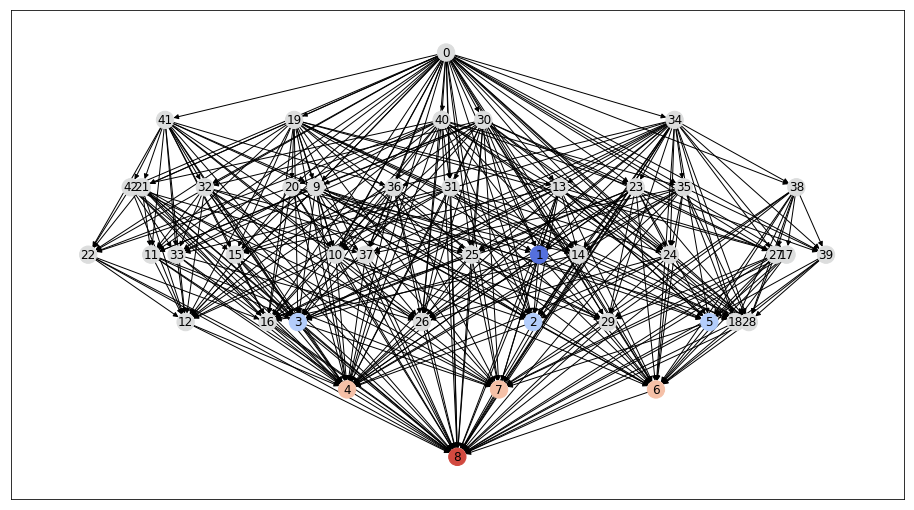

In [6]:
_ = spec_fsm_max_cover[1].visualize()
spec_fsm_max_cover[1].id2states

Note that even though the state description is a bit more complex, because of subsumption, the state machines of the simpler formulas are simply subsets of the state machines of the main formula. This saves us a lot of enumeration by minimizing the FSM description. This is much more drastic in the synthetic and dinner table domains.

Similarly the FSMs for minimum regret and chance constrained planning are virtually identical, differing only in the number of formulas contained in the state description

## Least restrictive is most likely ##

Here the differences in the notions are more pronounced. Lets start with the MAP formulation

{0: ('["and", ["F", ["A"]], ["G", ["P"]]]',),
 1: ('["G", ["P"]]',),
 2: ('[false]',)}

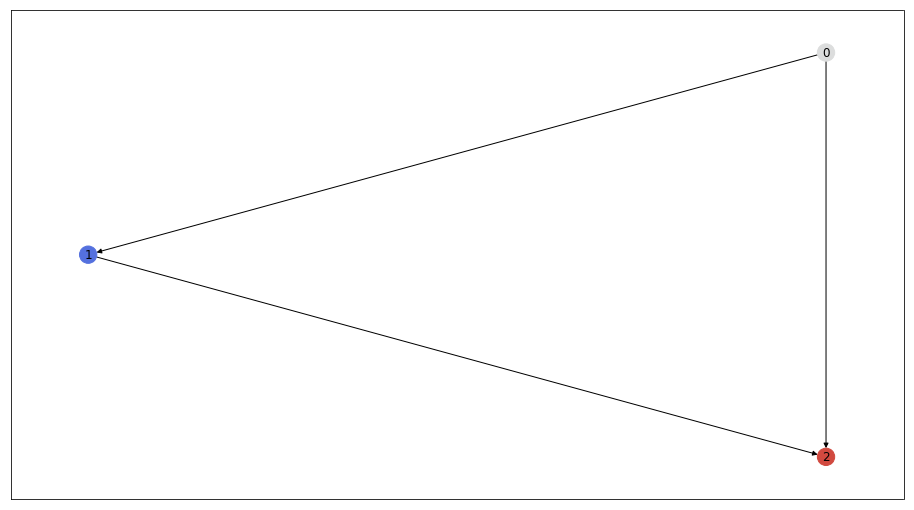

In [7]:
_ = spec_fsm_map[2].visualize()
spec_fsm_map[2].id2states

We see that this only includes the simplest formula.

The max cover and the minimum regret formuations are mostly identical as well


[('["G", ["P"]]', '["G", ["E"]]', '["G", ["D"]]'),
 ('[false]', '["G", ["E"]]', '["G", ["D"]]'),
 ('["G", ["P"]]', '[false]', '["G", ["D"]]'),
 ('[false]', '[false]', '["G", ["D"]]'),
 ('["G", ["P"]]', '["G", ["E"]]', '[false]'),
 ('[false]', '["G", ["E"]]', '[false]'),
 ('["G", ["P"]]', '[false]', '[false]'),
 ('[false]', '[false]', '[false]')]

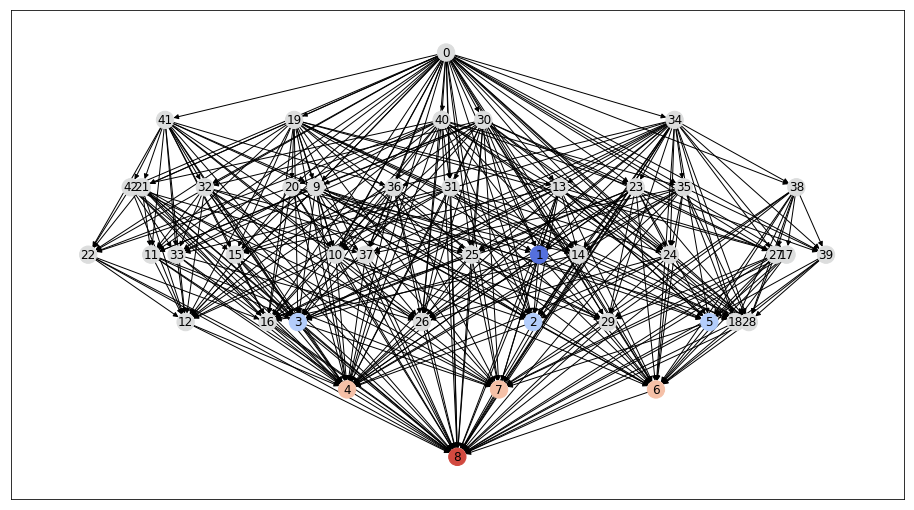

In [63]:
_ = spec_fsm_max_cover[2].visualize()
spec_fsm_max_cover[2].terminal_states

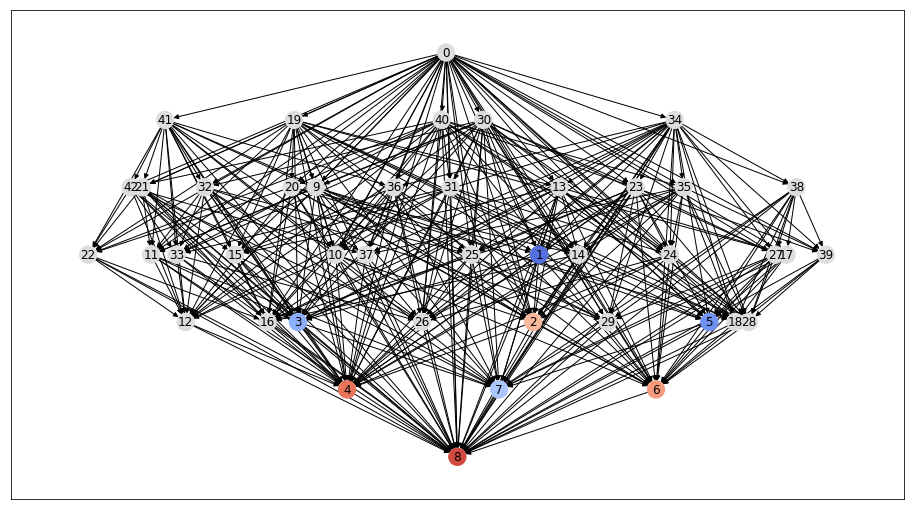

In [64]:
_ = spec_fsm_min_regret[2].visualize()

Things start to get interesting with the chance constrained formulation. Here is the FSM with 25% of failure

This spec contains 2 formulas
['and', ['F', ['A']], ['G', ['P']]]
['and', ['F', ['A']], ['F', ['B']], ['G', ['E']]]

The progression states are:
 {0: ('["and", ["F", ["A"]], ["G", ["P"]]]', '["and", ["F", ["A"]], ["F", ["B"]], ["G", ["E"]]]'), 1: ('["G", ["P"]]', '["G", ["E"]]'), 2: ('[false]', '["G", ["E"]]'), 3: ('["G", ["P"]]', '[false]'), 4: ('[false]', '[false]'), 5: ('["G", ["P"]]', '["and", ["F", ["B"]], ["G", ["E"]]]'), 6: ('[false]', '["and", ["F", ["B"]], ["G", ["E"]]]'), 7: ('["and", ["F", ["A"]], ["G", ["P"]]]', '["and", ["F", ["A"]], ["G", ["E"]]]'), 8: ('[false]', '["and", ["F", ["A"]], ["G", ["E"]]]'), 9: ('["and", ["F", ["A"]], ["G", ["P"]]]', '[false]'), 10: ('[false]', '["and", ["F", ["A"]], ["F", ["B"]], ["G", ["E"]]]')}


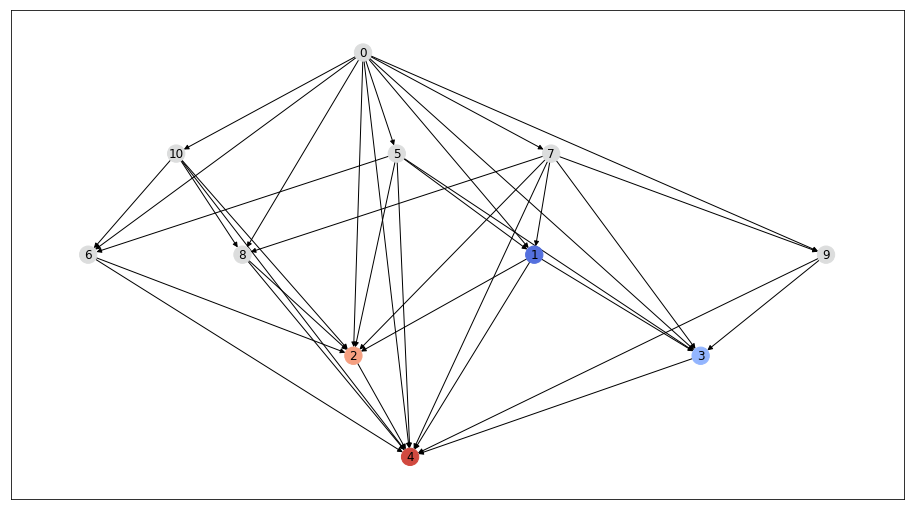

In [8]:
_ = spec_fsm_cc[(2,0.25)].visualize()
nForm = len(spec_fsm_cc[(2,0.25)]._formulas)
print(f'This spec contains {nForm} formulas')
for formula in spec_fsm_cc[(2,0.25)]._formulas: print(formula) 

print('\nThe progression states are:\n', spec_fsm_cc[(2,0.25)].id2states)

## Multiple overlapping formulas ##

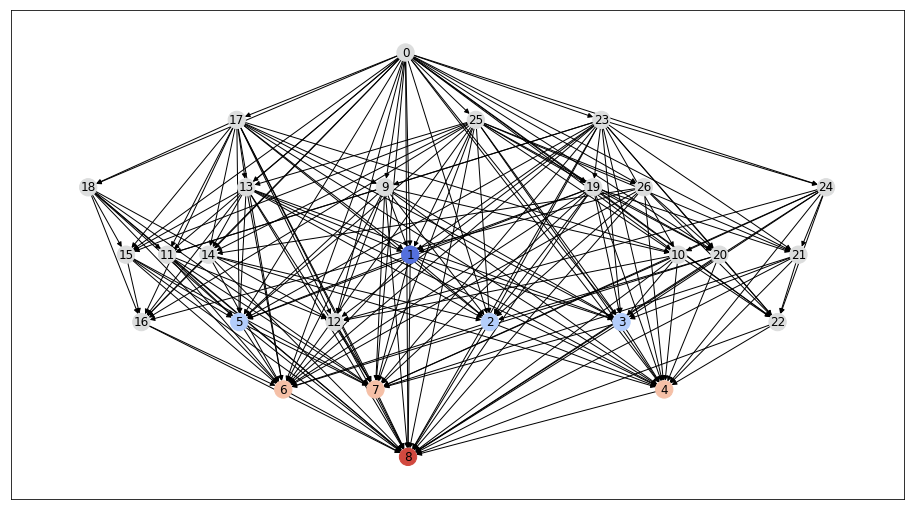

In [9]:
_ = spec_fsm_max_cover[3].visualize()

Here is what the states mean

In [10]:
print(Probs[3])
spec_fsm_max_cover[3].terminal_states


[0.3, 0.4, 0.3]


[('["G", ["E"]]', '["G", ["P"]]', '["G", ["D"]]'),
 ('["G", ["E"]]', '[false]', '["G", ["D"]]'),
 ('[false]', '["G", ["P"]]', '["G", ["D"]]'),
 ('[false]', '[false]', '["G", ["D"]]'),
 ('["G", ["E"]]', '["G", ["P"]]', '[false]'),
 ('["G", ["E"]]', '[false]', '[false]'),
 ('[false]', '["G", ["P"]]', '[false]'),
 ('[false]', '[false]', '[false]')]

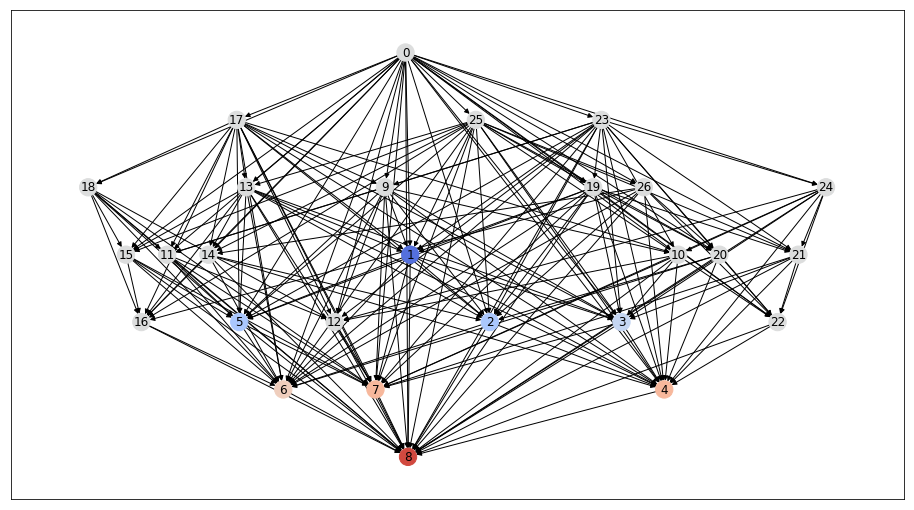

In [11]:
_ = spec_fsm_min_regret[3].visualize()

3 formulas


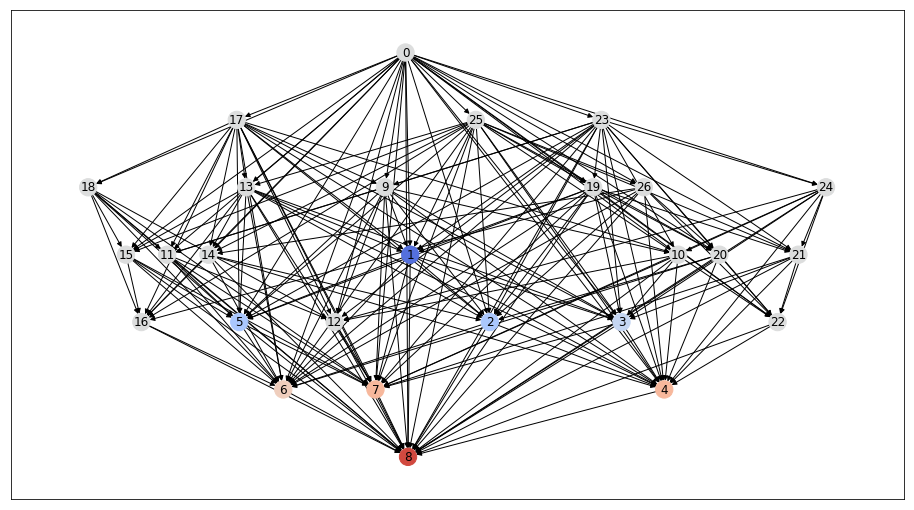

In [12]:
_ = spec_fsm_cc[(3,0.25)].visualize()
nform = len(spec_fsm_cc[(3,0.25)]._formulas)
print(f'{nform} formulas')

2 formulas


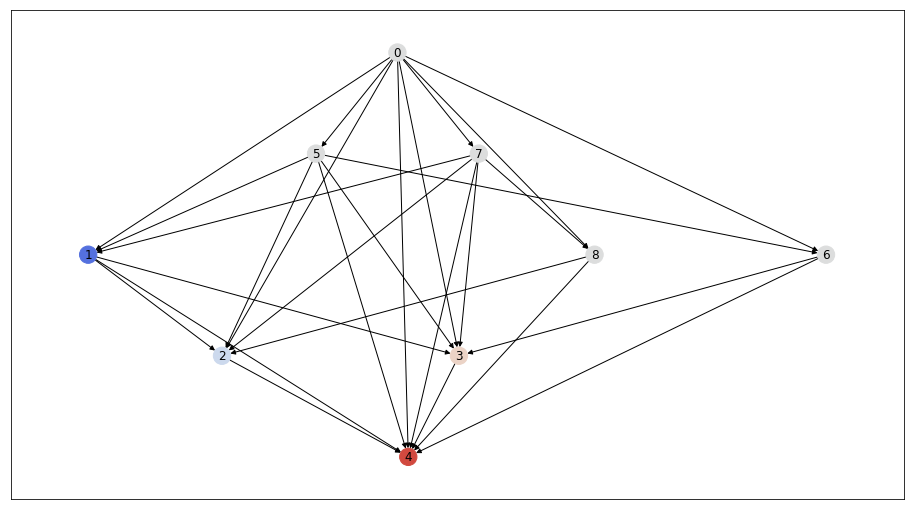

In [13]:
_ = spec_fsm_cc[(3,0.5)].visualize()
nform = len(spec_fsm_cc[(3,0.5)]._formulas)
print(f'{nform} formulas')

1 formulas


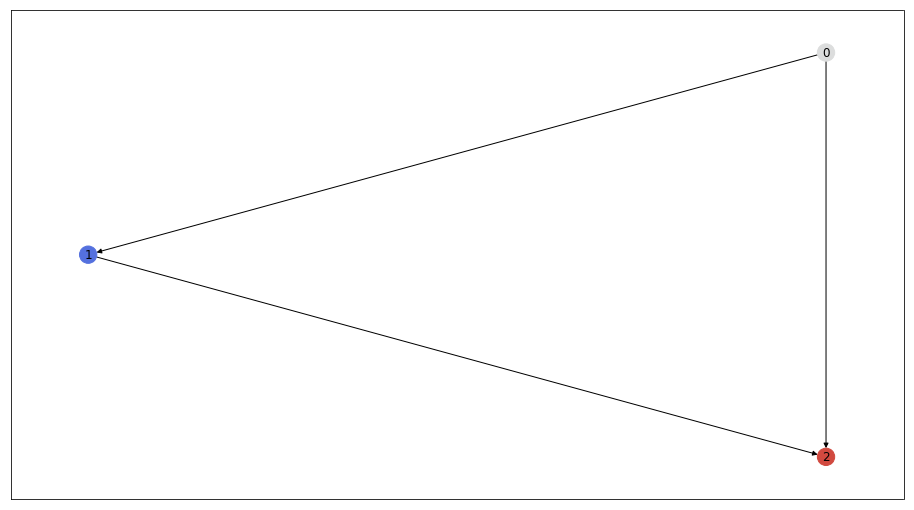

In [14]:
_ = spec_fsm_cc[(3,0.75)].visualize()
nform = len(spec_fsm_cc[(3,0.75)]._formulas)
print(f'{nform} formulas')

## Disjoint specifications ##

array([list(['and', ['F', ['C']], ['G', ['D']]])], dtype=object)

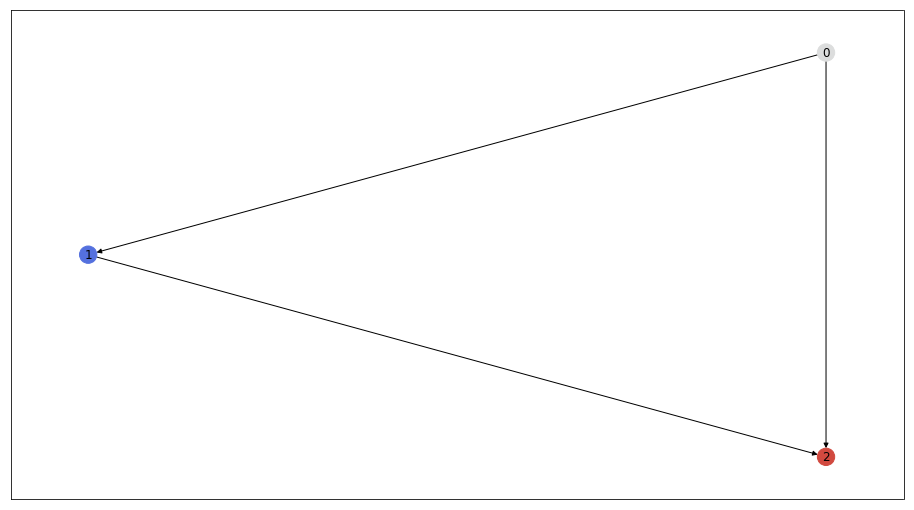

In [16]:
spec_fsm_map[4].visualize()
spec_fsm_map[4]._formulas

[('["G", ["D"]]', '[false]', '[false]'),
 ('[false]', '[false]', '[false]'),
 ('[false]', '["G", ["not", ["C"]]]', '["G", ["not", ["C"]]]')]

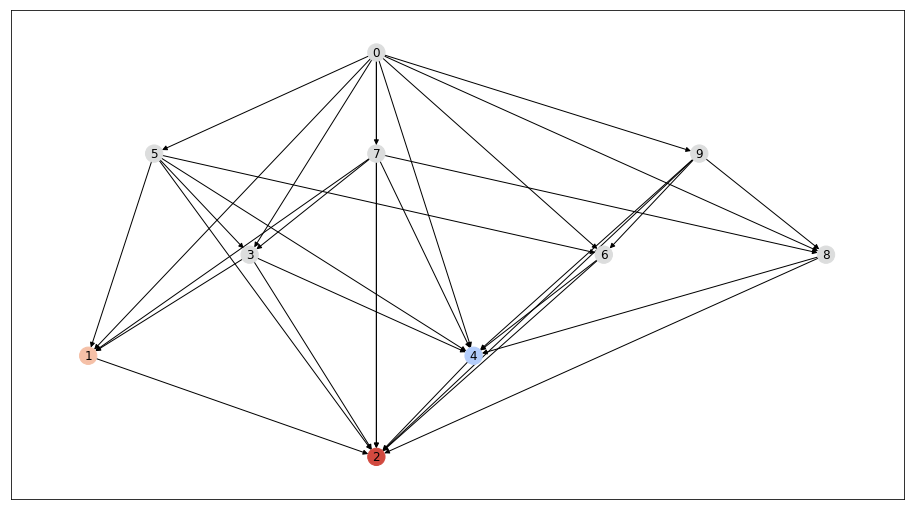

In [93]:
spec_fsm_max_cover[4].visualize()
spec_fsm_max_cover[4].terminal_states

[('["G", ["D"]]', '[false]', '[false]'),
 ('[false]', '[false]', '[false]'),
 ('[false]', '["G", ["not", ["C"]]]', '["G", ["not", ["C"]]]')]

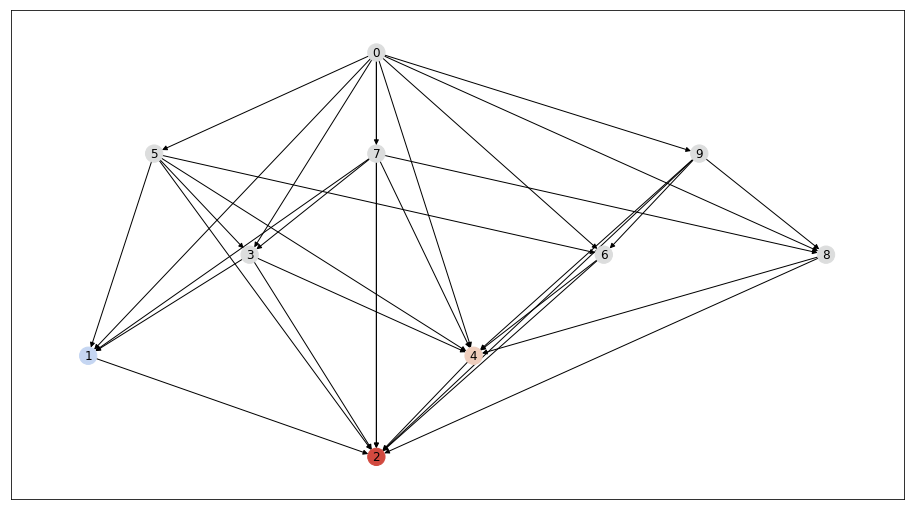

In [17]:
spec_fsm_min_regret[4].visualize()
spec_fsm_min_regret[4].terminal_states

In [21]:
formula = ['F,['['U',['not',['a']],['b']]

progression_states, edges = FindAllProgressions_single_formula(formula)
progression_states

{'["U", ["not", ["a"]], ["b"]]': 0, '[false]': 2, '[true]': 1}